In [1]:
import scenic
from scenic.simulators.carla.simulator import CarlaSimulator
from scenic.syntax.veneer import localPath
from pprint import pp
import numpy as np
from scenic.core.regions import MeshVolumeRegion
import trimesh
MAX_STEPS = 200

realization = {}
realization['max_steps'] = MAX_STEPS



scenario = scenic.scenarioFromFile('test.scenic', params={"realization":realization}, mode2D=True)
scene, _ = scenario.generate()
simulator = CarlaSimulator(carla_map = 'Town01', map_path = localPath('../../multi_objective/maps/Town01.xodr'))
simulation = simulator.simulate(scene, maxSteps=MAX_STEPS)


/home/ekin/Scenic/src/scenic/core/errors.py:271: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn("unable to install sys.excepthook to format Scenic backtraces")


In [2]:
network = realization['network']
drivable_region = network.drivableRegion

In [19]:
ego_mesh = realization['mesh'][0]
adv_mesh = realization['mesh'][1]
ego_dimensions = realization['dimensions'][0]
adv_dimensions = realization['dimensions'][1]
for i in range(MAX_STEPS-1):
    ego_position = realization['trajectory'][i]['position'][0]
    adv_position = realization['trajectory'][i]['position'][1]
    ego_orientation = realization['trajectory'][i]['orientation'][0]
    adv_orientation = realization['trajectory'][i]['orientation'][1]
    
    ego_region = MeshVolumeRegion(mesh=ego_mesh, dimensions=ego_dimensions, rotation=ego_orientation, position=ego_position)
    adv_region = MeshVolumeRegion(mesh=adv_mesh, dimensions=adv_dimensions, rotation=adv_orientation, position=adv_position)
    
    if ego_region.intersects(adv_region):
        print("Collision detected at step ", i)
        break
    
scene=trimesh.Scene([ego_region.mesh, adv_region.mesh])
scene.show()




Collision detected at step  22


In [20]:
ego_region.mesh.intersection(adv_region.mesh).show()

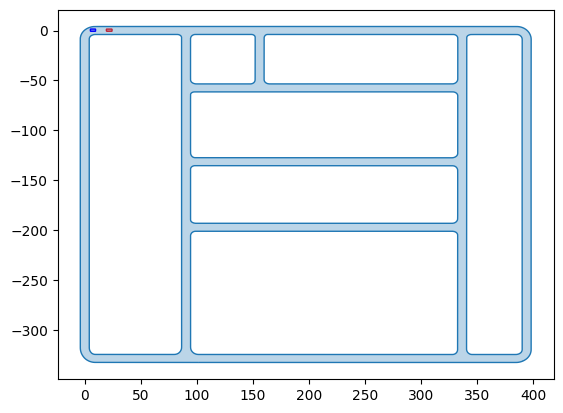

In [24]:
import shapely

import shapely.plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML

def update(frame, multiplier=5):
    ax.clear()
    ego_position = realization['trajectory'][frame*multiplier]['position'][0]
    ego_orientation = realization['trajectory'][frame*multiplier]['orientation'][0]
    adv_position = realization['trajectory'][frame*multiplier]['position'][1]
    adv_orientation = realization['trajectory'][frame*multiplier]['orientation'][1]
    ego_region = MeshVolumeRegion(mesh=ego_mesh, dimensions=ego_dimensions, rotation=ego_orientation, position=ego_position)
    adv_region = MeshVolumeRegion(mesh=adv_mesh, dimensions=adv_dimensions, rotation=adv_orientation, position=adv_position)
    shapely.plotting.plot_polygon(ego_region.boundingPolygon.polygons, ax=ax, add_points=False, color='red')
    shapely.plotting.plot_polygon(drivable_region.polygons, ax=ax, add_points=False)
    shapely.plotting.plot_polygon(adv_region.boundingPolygon.polygons, ax=ax, add_points=False, color='blue')






fig, ax = plt.subplots()

anim = animation.FuncAnimation(fig, update, frames=MAX_STEPS//5, repeat=False)
HTML(anim.to_jshtml())

In [6]:
ego_pos = realization['trajectory'][199]['position'][0]
ego_orient = realization['trajectory'][199]['orientation'][0]
ego_region = MeshVolumeRegion(mesh=ego_mesh, dimensions=ego_dimensions, rotation=ego_orient, position=ego_pos)

In [ ]:
drivable_region.intersect(ego_region).area


10.345399587767565

In [17]:
ego_region.boundingPolygon.polygons.distance(drivable_region.polygons)

0.0

In [12]:
from test_rule import rule_vru_collision, rule_vehicle_collision, rule_stay_in_drivable_area
pp(rule_vehicle_collision(realization))
pp(rule_vru_collision(realization))
pp(rule_stay_in_drivable_area(realization))

0
7.171062417492832
7.724853401931242


In [230]:
ego = realization['ego']
adv = realization['adv']

In [254]:
ego.boundingBox.boundingPolygon

PolygonalRegion(<MULTIPOLYGON Z (((334.342 -232.322 -2.25, 334.342 -227.821 -2.25, 336.345 -...>, 0)

In [246]:
realization['trajectory'][6]['orientation']

[array([3.14063312e+00, 7.66992540e-04, 1.62448887e-06]),
 array([3.14098838, 0.        , 0.        ])]